# EDA

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


path = '/home/jln436/Internship_AUMC/'

## Merge trimmed data files

In [2]:
# Load individuals, for only keeping face to face interviews:
B_individuals = pd.read_csv(path + 'output/B_individuals.csv').respnr

In [3]:
LASAB002 = pd.read_spss(path + "lasafiles/LASAB002.SAV")
LASAB002_trimmed = LASAB002[LASAB002.respnr.isin(B_individuals)]
LASAB002_trimmed = LASAB002_trimmed.reset_index(drop = True)

In [4]:
# Only keep Individuals with complete interview
print(LASAB002_trimmed.bstatus.value_counts())
print(LASAB002_trimmed.selfaint.value_counts())

complete interview            1277
short interview                 23
incomplete interview             8
-1.0                             0
incomplete short interview       0
Name: bstatus, dtype: int64
participated in selfadm quest    1118
refused selfadm quest             190
refused before mainint              0
Name: selfaint, dtype: int64


In [5]:
LASAB002_trimmed.groupby(["bstatus", "selfaint"]).size()

bstatus                     selfaint                     
-1.0                        participated in selfadm quest       0
                            refused before mainint              0
                            refused selfadm quest               0
complete interview          participated in selfadm quest    1100
                            refused before mainint              0
                            refused selfadm quest             177
incomplete interview        participated in selfadm quest       2
                            refused before mainint              0
                            refused selfadm quest               6
incomplete short interview  participated in selfadm quest       0
                            refused before mainint              0
                            refused selfadm quest               0
short interview             participated in selfadm quest      16
                            refused before mainint              0
                  

In [6]:
input_path = path + "output"
B_csv_files = glob.glob(os.path.join(input_path, "LASAB*.csv"))
ZB_csv_files = glob.glob(os.path.join(input_path, "LASAZB*.csv"))
Z_csv_files = glob.glob(os.path.join(input_path, "LASAZ0*.csv"))
ZDC1_file = input_path + "/LASAZDC1_trimmed.csv"
C_info = input_path + '/LASAC155_trimmed.csv'

In [7]:
B_csv_files = B_csv_files + ZB_csv_files + Z_csv_files + [C_info] + [ZDC1_file]

In [ ]:
'Bmir', 'aeducat', 'bage', 'balcos04', 'balcos09', 'bbmi', 'bcardig4', 'bhob', 'binccat', 'bincsat2', 'blphya23', 'blphya24', 'bmpeakf1', 'bmpeakfu', 'bnroomsc', 'bqfood04'

In [8]:
pd.set_option('display.max_rows', 945)
for i in range(1, len(B_csv_files)):
    tmp_df = pd.read_csv(B_csv_files[i])
    print(B_csv_files[i] + " columns:")
    print(tmp_df.columns)

/home/jln436/Internship_AUMC/output/LASAB011_trimmed.csv columns:
Index(['respnr', 'bnupers'], dtype='object')
/home/jln436/Internship_AUMC/output/LASAB012_trimmed.csv columns:
Index(['respnr', 'bpets', 'bcat', 'bdog', 'bbird', 'bpetsoth', 'bnspecie'], dtype='object')
/home/jln436/Internship_AUMC/output/LASAB013_trimmed.csv columns:
Index(['respnr', 'bremarks', 'bcountry_holland', 'bcountry_other',
       'bprovince_noord_holland', 'bprovince_other'],
      dtype='object')
/home/jln436/Internship_AUMC/output/LASAB015_trimmed.csv columns:
Index(['respnr', 'bmortga', 'bmovefut', 'byneigh', 'bpleas', 'bsafe',
       'bhowner_own', 'bhowner_missing', 'bhowner_other'],
      dtype='object')
/home/jln436/Internship_AUMC/output/LASAB017_trimmed.csv columns:
Index(['respnr', 'brespinc', 'bpartinc', 'binccat'], dtype='object')
/home/jln436/Internship_AUMC/output/LASAB018_trimmed.csv columns:
Index(['respnr', 'bhinsura_private'], dtype='object')
/home/jln436/Internship_AUMC/output/LASAB019_trimm

In [9]:
B_df1 = pd.read_csv(B_csv_files[0])
for i in range(1, len(B_csv_files)):
    tmp_df = pd.read_csv(B_csv_files[i])
    B_df1 = B_df1.merge(tmp_df,how = 'left', on='respnr')


In [10]:
# Only keep individuals with complete interview:
B_df1.drop(B_df1[LASAB002_trimmed.bstatus != 'complete interview'].index, inplace = True)

# Only keep individuals who participated in selfadministered questionaire
B_df1.drop(B_df1[LASAB002_trimmed.selfaint != 'participated in selfadm quest'].index, inplace = True)

/tmp/ipykernel_156158/1961850024.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  B_df1.drop(B_df1[LASAB002_trimmed.selfaint != 'participated in selfadm quest'].index, inplace = True)


In [11]:
# Create the target for prediction:
B_df1['target'] = B_df1['cmcodt_mean']

In [12]:
# Save binccat because income is probably important (will fill missing with median)
binccat = B_df1.binccat

## Check the individuals with very high or very low cmodt scor

In [13]:
# Check  those less than 10
B_df1.loc[(B_df1.cmcodt_mean < 10)]

,respnr,bmcodt1,bmcodt2,bmcodt3,bmcodtp,bmcodtpoth,bmcodt_mean,bmcodt_median,bmcodt_std,bmcodtp_mode,bnupers,bpets,bcat,bdog,bbird,bpetsoth,bnspecie,bremarks,bcountry_holland,bcountry_other,bprovince_noord_holland,bprovince_other,bmortga,bmovefut,byneigh,bpleas,bsafe,bhowner_own,bhowner_missing,bhowner_other,brespinc,bpartinc,binccat,bhinsura_private,bincdecl,bincsat1,bincsat2,bincfutu,bmemory1,bmemory2,bravamis,bravbmis,braabmis,balcos01,balcos02,balcos03,balcos04,balcos05,balcos06,balcos07,balcos08,balcos09,balcos10,balcos11,balcos12,bcesd01,bcesd02,bcesd03,bcesd04,bcesd05,bcesd06,bcesd07,bcesd08,bcesd09,bcesd10,bcesd11,bcesd12,bcesd13,bcesd14,bcesd15,bcesd16,bcesd17,bcesd18,bcesd19,bcesd20,bcesdmv,banxiet1,banxiet2,banxiet3,banxiet4,banxiet5,banxiet6,banxiet7,bmaster1,bmaster2,bmaster3,bmaster4,bmaster5,bmasmv,bselfes1,bartve8a,bartve8b,bartve8c,bartve8d,bartve8e,bartvei1,bartvei2,bartvei3,bartvei4,bartvei5,bartvei6,bartvei7,bartvei8,bartvei9,bcance5a,bcance5b,bcance5c,bcance5d,bcance5e,bcance5f,bcance5g,bcance5h,bcance5i,bcance5j,bcance5k,bcance5l,bcance6a,bcance6b,bcance6c,bcance6d,bcance6e,bcance7a,bcance7b,bcance7c,bcance7d,bcancer1,bcancer2,bcancer3,bcancer4,bcancer6,bcancer8,bcara01,bcara02,bcara03,bcara04,bcara05,bcara06,bcara07,bcara08,bcara09,bcara10,bcara11,bcara12,bcva01,bcva06,bcva07,bcva08,bcva09,bcva10,bcva11,bcva12,bdiabe01,bdiabe02,bdiabe03,bdiabe04,bdiabe05,bdiabe07,bdiabe08,bdiabe09,bdiabe10,bdiabe11,bdiabe12,bdiabe13,bhart01,bhart02,bhart03,bhart04,bhart05,bhart06,bhart10,bhart11,bhart12,bhart13,bhart14,bhart15,bhart15a,bhart15b,bhart15c,bhart15d,bhart15e,bhart16,bincon1,bincon2,bincon3,bincon4,bincon5,bincon6,bincon7,bincon8,bothsi01,bothsi04,bothsi05,bothsi06,bothsi07,bothsi10,bothsi11,bothsi12,brheum01,brheum02,brheum03,brheum04,brheum05,brheum06,brheum07,brheum08,brheum09,brheum10,brheum11,brheum12,brheum8a,brheum8b,brheum8c,brheum8d,brheum8e,brheum8f,brheum8g,brheum8h,brheum8i,brheum9a,brheum9b,brheum9c,brheum9d,brheum9e,brheum9f,brheum9g,brheum9h,brheum9i,brheum_01_and_02,bothsi02_Hypertension,bothsi02_Backproblems,bothsi02_intestinal_and_stomach,bothsi02_Eye_disease,bothsi02_other,bothsi08_none,bothsi08_Hypertension,bothsi08_Backproblems,bothsi08_intestinal_and_stomach,bothsi08_Eye_disease,bm15wth,bm15wtm,bm15wtrnd,bm15wtrno,bhealth1,bhealth3,bhealth4,brhelpyn,bphelpyn,bdhelpyn,bhealth2_3minus,bhealth2_No,bhealth2_missing,bcardig1,bcardig2,bcardig3,bcardig4,bcardig7,bcardig8,bchair1,bchair2,bchair3,bchair4,bchair5,bchair6,bchair7,bchair8,bchair9,bwalk01,bwalk02,bwalk03,bwalk04,bwalk05,bwalk07,bwalk09,bwalk10,bwalk19,bsubhea1,bsubhea2,bmedspec,bhosp,bpsych,bpsyhosp,beval01,beval02,beval03,beval04,blo1,blo2,blo3,blo4,blo5,blo6,blo7,blo8,blo9,blo10,blo11,blo_sum,blo_mode,blo_median,ban1,ban4,ban6,ban8,ban9,ban10,ban_sum,ban_mode,ban_median,bqaid1,bqaid2,bqaid3,bqaid4,bqaid5,bqaid6,bqaid7,bqaid8,bqsatis1,bqsatis2,bqimpor1,bqimpor2,bqimpor3,bqimpor4,bqimpor5,bqimpor6,bqimpor7,bqimpor8,bqimpor9,bqnansw,bqhealt1,bqhealt2,bqhealt3,bqhealt4,bqhealt5,bqhealt6,bqhealt7,bqhealt8,bqseff01,bqseff02,bqseff03,bqseff04,bqseff05,bqseff06,bqseff07,bqseff08,bqseff09,bqseff10,bqpain1,bqpain2,bqpain3,bqpain4,bqpain5,bqpain6,bqdecu01,bqdecu02,bqsleep1,bqsleep2,bqsleep3,bqsleep4,bnormal_sleep,bhigh_sleep,bqfood01,bqfood02,bqfood03,bqfood04,bqfood05,bqfood06,bqfood07,bqfood08,bqfood09,bqfood10,bqfood11,bqfood12,bqfood13,bqfood14,bqfood15,bqfood16,bqfood17,bqfood18,bqfood19,bqfood20,bqsex01,bqsex02,bqsex03,bqsocp01,bqsocp02,bqsocp03,bqvalu01,bqvalu02,bqvalu03,bmalbumi,bmbse,bmcalciu,bmcreati,bmcrp,bmerytr,bmferro,bmfolu,bmfreet4,bmgamma,bmglucos,bmhb,bmhdl,bmhdlcho,bmht,bmldl,bmleuc,bmotasat,bmtotcho,bmtotpro,bmtrigly,bmtsh,bmureum,bmvitb12,bmil6,bmhscrp,bmact,bqsocp07,bqsocp08,bqsocp09,bqsocp10,bqsocp11,bqsocp12,bqsocp14,bqsocp15,bqsocp16,bqsocp17,bqsocp18,bqsocp19,bqsocp21,bm#med,bmmeduse,bmmedvittab,bmmedcaltab,bmalcnr,bmalcnr6,bmalcyn,bno_alc_use,bmoderate_alc_use,bmctinch,bmctley1,bmctley2,bmctley3,bmctley4,bmctley5,bm

In [14]:
# Check  those greater than 35
B_df1.loc[(B_df1.cmcodt_mean > 35)]

,respnr,bmcodt1,bmcodt2,bmcodt3,bmcodtp,bmcodtpoth,bmcodt_mean,bmcodt_median,bmcodt_std,bmcodtp_mode,bnupers,bpets,bcat,bdog,bbird,bpetsoth,bnspecie,bremarks,bcountry_holland,bcountry_other,bprovince_noord_holland,bprovince_other,bmortga,bmovefut,byneigh,bpleas,bsafe,bhowner_own,bhowner_missing,bhowner_other,brespinc,bpartinc,binccat,bhinsura_private,bincdecl,bincsat1,bincsat2,bincfutu,bmemory1,bmemory2,bravamis,bravbmis,braabmis,balcos01,balcos02,balcos03,balcos04,balcos05,balcos06,balcos07,balcos08,balcos09,balcos10,balcos11,balcos12,bcesd01,bcesd02,bcesd03,bcesd04,bcesd05,bcesd06,bcesd07,bcesd08,bcesd09,bcesd10,bcesd11,bcesd12,bcesd13,bcesd14,bcesd15,bcesd16,bcesd17,bcesd18,bcesd19,bcesd20,bcesdmv,banxiet1,banxiet2,banxiet3,banxiet4,banxiet5,banxiet6,banxiet7,bmaster1,bmaster2,bmaster3,bmaster4,bmaster5,bmasmv,bselfes1,bartve8a,bartve8b,bartve8c,bartve8d,bartve8e,bartvei1,bartvei2,bartvei3,bartvei4,bartvei5,bartvei6,bartvei7,bartvei8,bartvei9,bcance5a,bcance5b,bcance5c,bcance5d,bcance5e,bcance5f,bcance5g,bcance5h,bcance5i,bcance5j,bcance5k,bcance5l,bcance6a,bcance6b,bcance6c,bcance6d,bcance6e,bcance7a,bcance7b,bcance7c,bcance7d,bcancer1,bcancer2,bcancer3,bcancer4,bcancer6,bcancer8,bcara01,bcara02,bcara03,bcara04,bcara05,bcara06,bcara07,bcara08,bcara09,bcara10,bcara11,bcara12,bcva01,bcva06,bcva07,bcva08,bcva09,bcva10,bcva11,bcva12,bdiabe01,bdiabe02,bdiabe03,bdiabe04,bdiabe05,bdiabe07,bdiabe08,bdiabe09,bdiabe10,bdiabe11,bdiabe12,bdiabe13,bhart01,bhart02,bhart03,bhart04,bhart05,bhart06,bhart10,bhart11,bhart12,bhart13,bhart14,bhart15,bhart15a,bhart15b,bhart15c,bhart15d,bhart15e,bhart16,bincon1,bincon2,bincon3,bincon4,bincon5,bincon6,bincon7,bincon8,bothsi01,bothsi04,bothsi05,bothsi06,bothsi07,bothsi10,bothsi11,bothsi12,brheum01,brheum02,brheum03,brheum04,brheum05,brheum06,brheum07,brheum08,brheum09,brheum10,brheum11,brheum12,brheum8a,brheum8b,brheum8c,brheum8d,brheum8e,brheum8f,brheum8g,brheum8h,brheum8i,brheum9a,brheum9b,brheum9c,brheum9d,brheum9e,brheum9f,brheum9g,brheum9h,brheum9i,brheum_01_and_02,bothsi02_Hypertension,bothsi02_Backproblems,bothsi02_intestinal_and_stomach,bothsi02_Eye_disease,bothsi02_other,bothsi08_none,bothsi08_Hypertension,bothsi08_Backproblems,bothsi08_intestinal_and_stomach,bothsi08_Eye_disease,bm15wth,bm15wtm,bm15wtrnd,bm15wtrno,bhealth1,bhealth3,bhealth4,brhelpyn,bphelpyn,bdhelpyn,bhealth2_3minus,bhealth2_No,bhealth2_missing,bcardig1,bcardig2,bcardig3,bcardig4,bcardig7,bcardig8,bchair1,bchair2,bchair3,bchair4,bchair5,bchair6,bchair7,bchair8,bchair9,bwalk01,bwalk02,bwalk03,bwalk04,bwalk05,bwalk07,bwalk09,bwalk10,bwalk19,bsubhea1,bsubhea2,bmedspec,bhosp,bpsych,bpsyhosp,beval01,beval02,beval03,beval04,blo1,blo2,blo3,blo4,blo5,blo6,blo7,blo8,blo9,blo10,blo11,blo_sum,blo_mode,blo_median,ban1,ban4,ban6,ban8,ban9,ban10,ban_sum,ban_mode,ban_median,bqaid1,bqaid2,bqaid3,bqaid4,bqaid5,bqaid6,bqaid7,bqaid8,bqsatis1,bqsatis2,bqimpor1,bqimpor2,bqimpor3,bqimpor4,bqimpor5,bqimpor6,bqimpor7,bqimpor8,bqimpor9,bqnansw,bqhealt1,bqhealt2,bqhealt3,bqhealt4,bqhealt5,bqhealt6,bqhealt7,bqhealt8,bqseff01,bqseff02,bqseff03,bqseff04,bqseff05,bqseff06,bqseff07,bqseff08,bqseff09,bqseff10,bqpain1,bqpain2,bqpain3,bqpain4,bqpain5,bqpain6,bqdecu01,bqdecu02,bqsleep1,bqsleep2,bqsleep3,bqsleep4,bnormal_sleep,bhigh_sleep,bqfood01,bqfood02,bqfood03,bqfood04,bqfood05,bqfood06,bqfood07,bqfood08,bqfood09,bqfood10,bqfood11,bqfood12,bqfood13,bqfood14,bqfood15,bqfood16,bqfood17,bqfood18,bqfood19,bqfood20,bqsex01,bqsex02,bqsex03,bqsocp01,bqsocp02,bqsocp03,bqvalu01,bqvalu02,bqvalu03,bmalbumi,bmbse,bmcalciu,bmcreati,bmcrp,bmerytr,bmferro,bmfolu,bmfreet4,bmgamma,bmglucos,bmhb,bmhdl,bmhdlcho,bmht,bmldl,bmleuc,bmotasat,bmtotcho,bmtotpro,bmtrigly,bmtsh,bmureum,bmvitb12,bmil6,bmhscrp,bmact,bqsocp07,bqsocp08,bqsocp09,bqsocp10,bqsocp11,bqsocp12,bqsocp14,bqsocp15,bqsocp16,bqsocp17,bqsocp18,bqsocp19,bqsocp21,bm#med,bmmeduse,bmmedvittab,bmmedcaltab,bmalcnr,bmalcnr6,bmalcyn,bno_alc_use,bmoderate_alc_use,bmctinch,bmctley1,bmctley2,bmctley3,bmctley4,bmctley5,bm

## Remove columns that don't provide information

In [15]:
B_df1

,respnr,bmcodt1,bmcodt2,bmcodt3,bmcodtp,bmcodtpoth,bmcodt_mean,bmcodt_median,bmcodt_std,bmcodtp_mode,bnupers,bpets,bcat,bdog,bbird,bpetsoth,bnspecie,bremarks,bcountry_holland,bcountry_other,bprovince_noord_holland,bprovince_other,bmortga,bmovefut,byneigh,bpleas,bsafe,bhowner_own,bhowner_missing,bhowner_other,brespinc,bpartinc,binccat,bhinsura_private,bincdecl,bincsat1,bincsat2,bincfutu,bmemory1,bmemory2,bravamis,bravbmis,braabmis,balcos01,balcos02,balcos03,balcos04,balcos05,balcos06,balcos07,balcos08,balcos09,balcos10,balcos11,balcos12,bcesd01,bcesd02,bcesd03,bcesd04,bcesd05,bcesd06,bcesd07,bcesd08,bcesd09,bcesd10,bcesd11,bcesd12,bcesd13,bcesd14,bcesd15,bcesd16,bcesd17,bcesd18,bcesd19,bcesd20,bcesdmv,banxiet1,banxiet2,banxiet3,banxiet4,banxiet5,banxiet6,banxiet7,bmaster1,bmaster2,bmaster3,bmaster4,bmaster5,bmasmv,bselfes1,bartve8a,bartve8b,bartve8c,bartve8d,bartve8e,bartvei1,bartvei2,bartvei3,bartvei4,bartvei5,bartvei6,bartvei7,bartvei8,bartvei9,bcance5a,bcance5b,bcance5c,bcance5d,bcance5e,bcance5f,bcance5g,bcance5h,bcance5i,bcance5j,bcance5k,bcance5l,bcance6a,bcance6b,bcance6c,bcance6d,bcance6e,bcance7a,bcance7b,bcance7c,bcance7d,bcancer1,bcancer2,bcancer3,bcancer4,bcancer6,bcancer8,bcara01,bcara02,bcara03,bcara04,bcara05,bcara06,bcara07,bcara08,bcara09,bcara10,bcara11,bcara12,bcva01,bcva06,bcva07,bcva08,bcva09,bcva10,bcva11,bcva12,bdiabe01,bdiabe02,bdiabe03,bdiabe04,bdiabe05,bdiabe07,bdiabe08,bdiabe09,bdiabe10,bdiabe11,bdiabe12,bdiabe13,bhart01,bhart02,bhart03,bhart04,bhart05,bhart06,bhart10,bhart11,bhart12,bhart13,bhart14,bhart15,bhart15a,bhart15b,bhart15c,bhart15d,bhart15e,bhart16,bincon1,bincon2,bincon3,bincon4,bincon5,bincon6,bincon7,bincon8,bothsi01,bothsi04,bothsi05,bothsi06,bothsi07,bothsi10,bothsi11,bothsi12,brheum01,brheum02,brheum03,brheum04,brheum05,brheum06,brheum07,brheum08,brheum09,brheum10,brheum11,brheum12,brheum8a,brheum8b,brheum8c,brheum8d,brheum8e,brheum8f,brheum8g,brheum8h,brheum8i,brheum9a,brheum9b,brheum9c,brheum9d,brheum9e,brheum9f,brheum9g,brheum9h,brheum9i,brheum_01_and_02,bothsi02_Hypertension,bothsi02_Backproblems,bothsi02_intestinal_and_stomach,bothsi02_Eye_disease,bothsi02_other,bothsi08_none,bothsi08_Hypertension,bothsi08_Backproblems,bothsi08_intestinal_and_stomach,bothsi08_Eye_disease,bm15wth,bm15wtm,bm15wtrnd,bm15wtrno,bhealth1,bhealth3,bhealth4,brhelpyn,bphelpyn,bdhelpyn,bhealth2_3minus,bhealth2_No,bhealth2_missing,bcardig1,bcardig2,bcardig3,bcardig4,bcardig7,bcardig8,bchair1,bchair2,bchair3,bchair4,bchair5,bchair6,bchair7,bchair8,bchair9,bwalk01,bwalk02,bwalk03,bwalk04,bwalk05,bwalk07,bwalk09,bwalk10,bwalk19,bsubhea1,bsubhea2,bmedspec,bhosp,bpsych,bpsyhosp,beval01,beval02,beval03,beval04,blo1,blo2,blo3,blo4,blo5,blo6,blo7,blo8,blo9,blo10,blo11,blo_sum,blo_mode,blo_median,ban1,ban4,ban6,ban8,ban9,ban10,ban_sum,ban_mode,ban_median,bqaid1,bqaid2,bqaid3,bqaid4,bqaid5,bqaid6,bqaid7,bqaid8,bqsatis1,bqsatis2,bqimpor1,bqimpor2,bqimpor3,bqimpor4,bqimpor5,bqimpor6,bqimpor7,bqimpor8,bqimpor9,bqnansw,bqhealt1,bqhealt2,bqhealt3,bqhealt4,bqhealt5,bqhealt6,bqhealt7,bqhealt8,bqseff01,bqseff02,bqseff03,bqseff04,bqseff05,bqseff06,bqseff07,bqseff08,bqseff09,bqseff10,bqpain1,bqpain2,bqpain3,bqpain4,bqpain5,bqpain6,bqdecu01,bqdecu02,bqsleep1,bqsleep2,bqsleep3,bqsleep4,bnormal_sleep,bhigh_sleep,bqfood01,bqfood02,bqfood03,bqfood04,bqfood05,bqfood06,bqfood07,bqfood08,bqfood09,bqfood10,bqfood11,bqfood12,bqfood13,bqfood14,bqfood15,bqfood16,bqfood17,bqfood18,bqfood19,bqfood20,bqsex01,bqsex02,bqsex03,bqsocp01,bqsocp02,bqsocp03,bqvalu01,bqvalu02,bqvalu03,bmalbumi,bmbse,bmcalciu,bmcreati,bmcrp,bmerytr,bmferro,bmfolu,bmfreet4,bmgamma,bmglucos,bmhb,bmhdl,bmhdlcho,bmht,bmldl,bmleuc,bmotasat,bmtotcho,bmtotpro,bmtrigly,bmtsh,bmureum,bmvitb12,bmil6,bmhscrp,bmact,bqsocp07,bqsocp08,bqsocp09,bqsocp10,bqsocp11,bqsocp12,bqsocp14,bqsocp15,bqsocp16,bqsocp17,bqsocp18,bqsocp19,bqsocp21,bm#med,bmmeduse,bmmedvittab,bmmedcaltab,bmalcnr,bmalcnr6,bmalcyn,bno_alc_use,bmoderate_alc_use,bmctinch,bmctley1,bmctley2,bmctley3,bmctley4,bmctley5,bm

In [16]:
# First convert every Na string to an actual Na value
B_df1.replace('Na', np.nan, inplace=True)
B_df1.replace('Na, short interview', np.nan, inplace = True)
B_df1.replace('No measurement', np.nan, inplace = True)
B_df1.replace('Na, wrong skip', np.nan, inplace = True)
B_df1.replace('not applicable', np.nan, inplace = True)
B_df1.replace('Not applicable', np.nan, inplace = True)
B_df1.replace('short version', np.nan, inplace = True)
B_df1.replace('Na, short version', np.nan, inplace = True)
B_df1.replace('Na, routing', np.nan, inplace = True)
B_df1.replace('Na, test not done', np.nan, inplace = True)

In [17]:
# Remove columns from c and d
B_df1 = B_df1.drop(B_df1.filter(regex='^c').columns, axis=1)
B_df1 = B_df1.drop(B_df1.filter(regex='^d').columns, axis=1)
B_df1 = B_df1.drop(B_df1.filter(regex='^A').columns, axis=1)
B_df1 = B_df1.drop(B_df1.filter(regex='^C').columns, axis=1)
B_df1 = B_df1.drop(B_df1.filter(regex='^D').columns, axis=1)

#### Generate table of columns with percentage of Na

In [18]:
Na_table = pd.DataFrame(data = 100*B_df1.isna().sum()/len(B_df1),columns = ['Percentage Na'])
Na_table.to_csv(path + 'output/Na_table.csv', index=True)

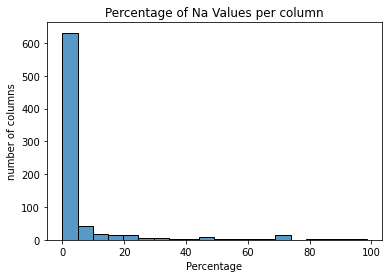

In [19]:
ax = sns.histplot(Na_table['Percentage Na'], bins = 20)
ax.set(xlabel='Percentage', ylabel='number of columns')
ax.set(title='Percentage of Na Values per column')
plt.show()

In [20]:
((B_df1.isna().sum()/len(B_df1)) > 0.05).sum()

144

In [21]:
# Remove features with more than 5% Nan values
B_df1 = B_df1.dropna(thresh=len(B_df1)*.95, axis=1)

In [22]:
(B_df1.isna().sum() < 1.0).sum()

227

#### Generate table of individuals with percentage of Na

In [23]:
Na_table_individuals = pd.DataFrame(data = B_df1.groupby('respnr').apply(lambda x: x.isna().sum().sum())/len(B_df1.columns)*100, columns = ['Percentage Na'])
Na_table_individuals.to_csv(path + 'output/Na_table_individuals.csv', index=True)

In [24]:
(Na_table_individuals['Percentage Na'] == 0).sum()

406

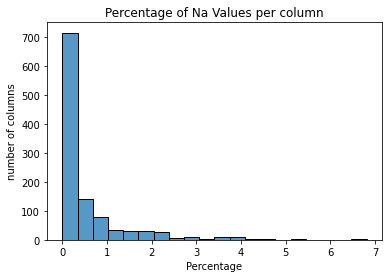

In [25]:
ax = sns.histplot(Na_table_individuals['Percentage Na'], bins = 20)
ax.set(xlabel='Percentage', ylabel='number of columns')
ax.set(title='Percentage of Na Values per column')
plt.show()

## Remove columns with variability of 0

In [26]:
pd.set_option('display.max_rows', 817)
col_low_var = B_df1.columns[B_df1.nunique(axis=0)==2]
col_no_var = B_df1.columns[B_df1.nunique(axis=0)==1]

In [27]:
# Remove all features with just one value
B_df1.drop(columns = col_no_var, inplace=True)

In [28]:
# All columns with more than 99% one value should be removed (For now, may increase percentage)
# No               99.272727
# not mentioned     0.727273
# Name: bcance6a, dtype: float64
# No               99.272727
# not mentioned     0.727273
# Name: bcance6c, dtype: float64
# No               99.272727
# not mentioned     0.727273
# Name: bcance6d, dtype: float64
# No     99.181818
# Yes     0.727273
# Name: bcancer6, dtype: float64
# No     99.090909
# Yes     0.636364
# Name: bcva09, dtype: float64
# No     99.363636
# Yes     0.363636
# Name: bcva11, dtype: float64
# No     99.272727
# Yes     0.727273
# Name: bdiabe09, dtype: float64
# No     99.0
# Yes     1.0
# Name: bdiabe12, dtype: float64
# Completed without help    99.363636
# Completed with help        0.090909
# Name: bcardig1, dtype: float64
# Completed without help    99.272727
# Completed with help        0.181818
# Name: bcardig2, dtype: float64
# Completed without help    99.090909
# Completed with help        0.363636
# Name: bcardig3, dtype: float64
# No     99.454545
# Yes     0.545455
# Name: bchair1, dtype: float64
# No     99.545455
# Yes     0.454545
# Name: bchair2, dtype: float64
# No     99.909091
# Yes     0.090909
# Name: bpsyhosp, dtype: float64
# No     99.545455
# Yes     0.363636
# Name: bmdecu07, dtype: float64
# none    99.727273
# 1.0      0.272727
# Name: bmtype_l, dtype: float64
# none    99.363636
# 1.0      0.636364
# Name: bmtype_v, dtype: float64
# no     99.363636
# yes     0.636364
# Name: bsense14, dtype: float64
# no missings    99.909091
# size=0          0.090909
# Name: Bmis247, dtype: float64
# 1993.0    99.909091
# 2012.0     0.090909
# Name: Burbyear_x, dtype: float64
# 1993.0    99.909091
# 2012.0     0.090909
# Name: Burbyear_y, dtype: float64

In [29]:
# Remove columns with more than 99% same value (b/c not enough variation)
remove_col = []
for i in col_low_var:
    if max(B_df1[i].value_counts()/len(B_df1)*100) >= 99:
        remove_col.append(i)

# Remove all features with just low variance
B_df1.drop(columns = remove_col, inplace=True)

## Add back income

In [30]:
B_df1['binccat'] = binccat

<AxesSubplot: >

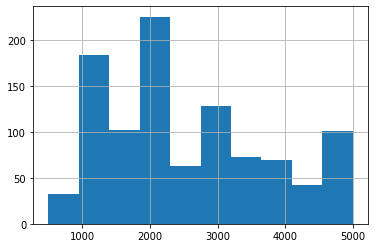

In [31]:
B_df1['binccat'].hist()

## Create/Deal with Features that were used by PhD student:
#### Now done in Preprocessing "Raw_data_Processing.ipynb"
#### Exception of bmi and systolic pressure because they require features from multiple waves

In [32]:
# BMI in kg/m2
# Which height to use? it changes each year (which is weird), weight makes sense
# For now using recorded height in c for b
height_squared = (B_df1.bmheight/100)**2
B_df1['bbmi'] = B_df1.bmweight/height_squared

# Systolic blood pressure ***Only available from C onwardes
LASAC151_trimmed = pd.read_csv(path + 'output/LASAC151_trimmed.csv')
B_df1['bsystolic_pressure'] = LASAC151_trimmed.cmfinss1


In [33]:
# List of features to use in baseline:
# bme4 (APOE4)
# sex (sex)
# primary_educat
# intermediate_voc
# higher_educat
# bsmokeyn
# no_alc_use
# moderate_acl_use
# bqphseff
# bcesdint
# normal_sleep
# high_sleep
# Bnwdiversity
# bbmi
# bsystolic_pressure
# bmtotcho*
# b_DM
# bhart05

baseline_features = ['bme4','sex','primary_educat','intermediate_voc','higher_educat','bmsmokeyn','bno_alc_use','bmoderate_alc_use',
                     'bqphseff','bcesdint','bnormal_sleep','bhigh_sleep','Bnwdiversity','bbmi','bsystolic_pressure','b_DM','bhart05']

## Distribution and Assumption of Normality for Information Processing Speed

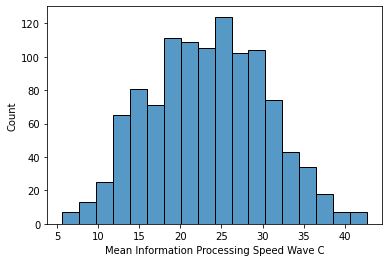

In [34]:
ax = sns.histplot(B_df1.target)
ax.set(xlabel='Mean Information Processing Speed Wave C')
plt.show()

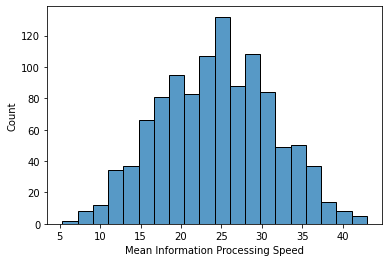

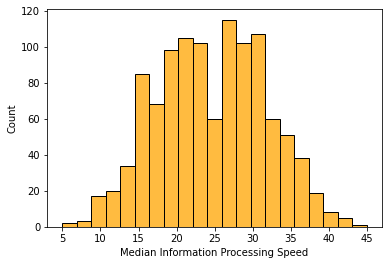

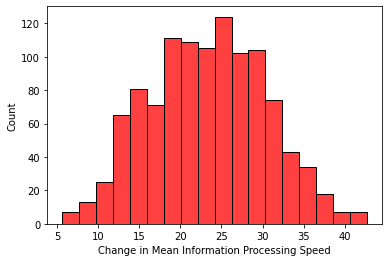

In [35]:
ax = sns.histplot(B_df1.bmcodt_mean)
ax.set(xlabel='Mean Information Processing Speed')
plt.show()

ax = sns.histplot(B_df1.bmcodt_median, color = 'orange')
ax.set(xlabel='Median Information Processing Speed')
plt.show()

ax = sns.histplot(B_df1.target, color = 'red')
ax.set(xlabel='Change in Mean Information Processing Speed')
plt.show()

In [36]:
# Assumption of normality for mean
k2, p_mean = stats.normaltest(B_df1.bmcodt_mean)
print("p_mean = {:g}".format(p_mean))

# Assumption of normality for mean
k2, p_median = stats.normaltest(B_df1.bmcodt_median)
print("p_median = {:g}".format(p_median))

# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html 

p_mean = 8.01666e-05
p_median = 5.79193e-05


#####  ***Both Mean and Median fit assumptions of normality

## Other interesting Distributions

In [37]:
# First convert byear to age
B_df1['bage'] = 1992 - B_df1['byear']

#### Age

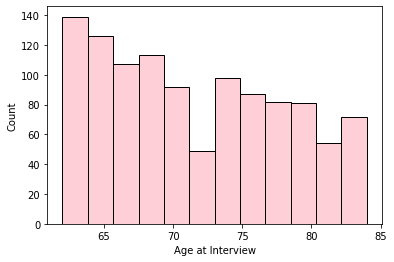

In [38]:
ax = sns.histplot(B_df1.bage, color = 'pink')
ax.set(xlabel='Age at Interview')
plt.show()

#### Sex

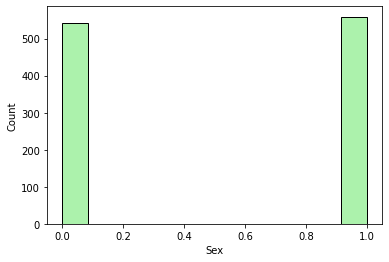

In [39]:
## Dataset well balanced in this regard
ax = sns.histplot(B_df1.sex, color = 'lightgreen')
ax.set(xlabel='Sex')
plt.show()

#### Processing speed differences in sex

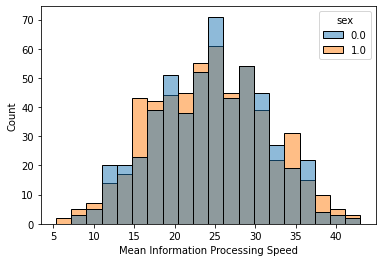

In [40]:
# No differences between sex stand out (which is good, means we can model them together)
ax = sns.histplot(data = B_df1, x = 'bmcodt_mean', hue = 'sex')
ax.set(xlabel='Mean Information Processing Speed')
plt.show()

In [41]:
# Perform t-test as well to check
stats.ttest_ind(B_df1.loc[B_df1['sex'] == 'male']['bmcodt_mean'], B_df1.loc[B_df1['sex'] == 'female']['bmcodt_mean'], equal_var=False)
# P-valu of 0.93 is a good indication no differences between male and female populations

Ttest_indResult(statistic=nan, pvalue=nan)

## Pets

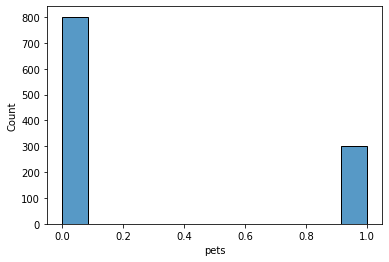

In [42]:
ax = sns.histplot(B_df1.bpets)
ax.set(xlabel='pets')
plt.show()

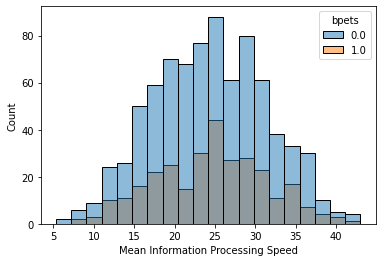

In [43]:
ax = sns.histplot(data = B_df1, x = 'bmcodt_mean', hue = 'bpets')
ax.set(xlabel='Mean Information Processing Speed')
plt.show()

## Memory 1 and 2

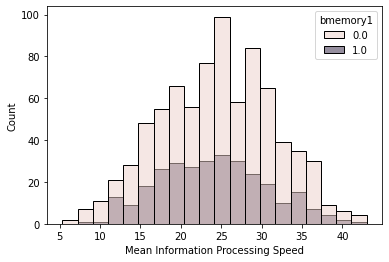

In [44]:
ax = sns.histplot(data = B_df1, x = 'bmcodt_mean', hue = 'bmemory1')
ax.set(xlabel='Mean Information Processing Speed')
plt.show()

## Look at some correlations

In [45]:
baseline_features2 = baseline_features
baseline_features2.append('target')

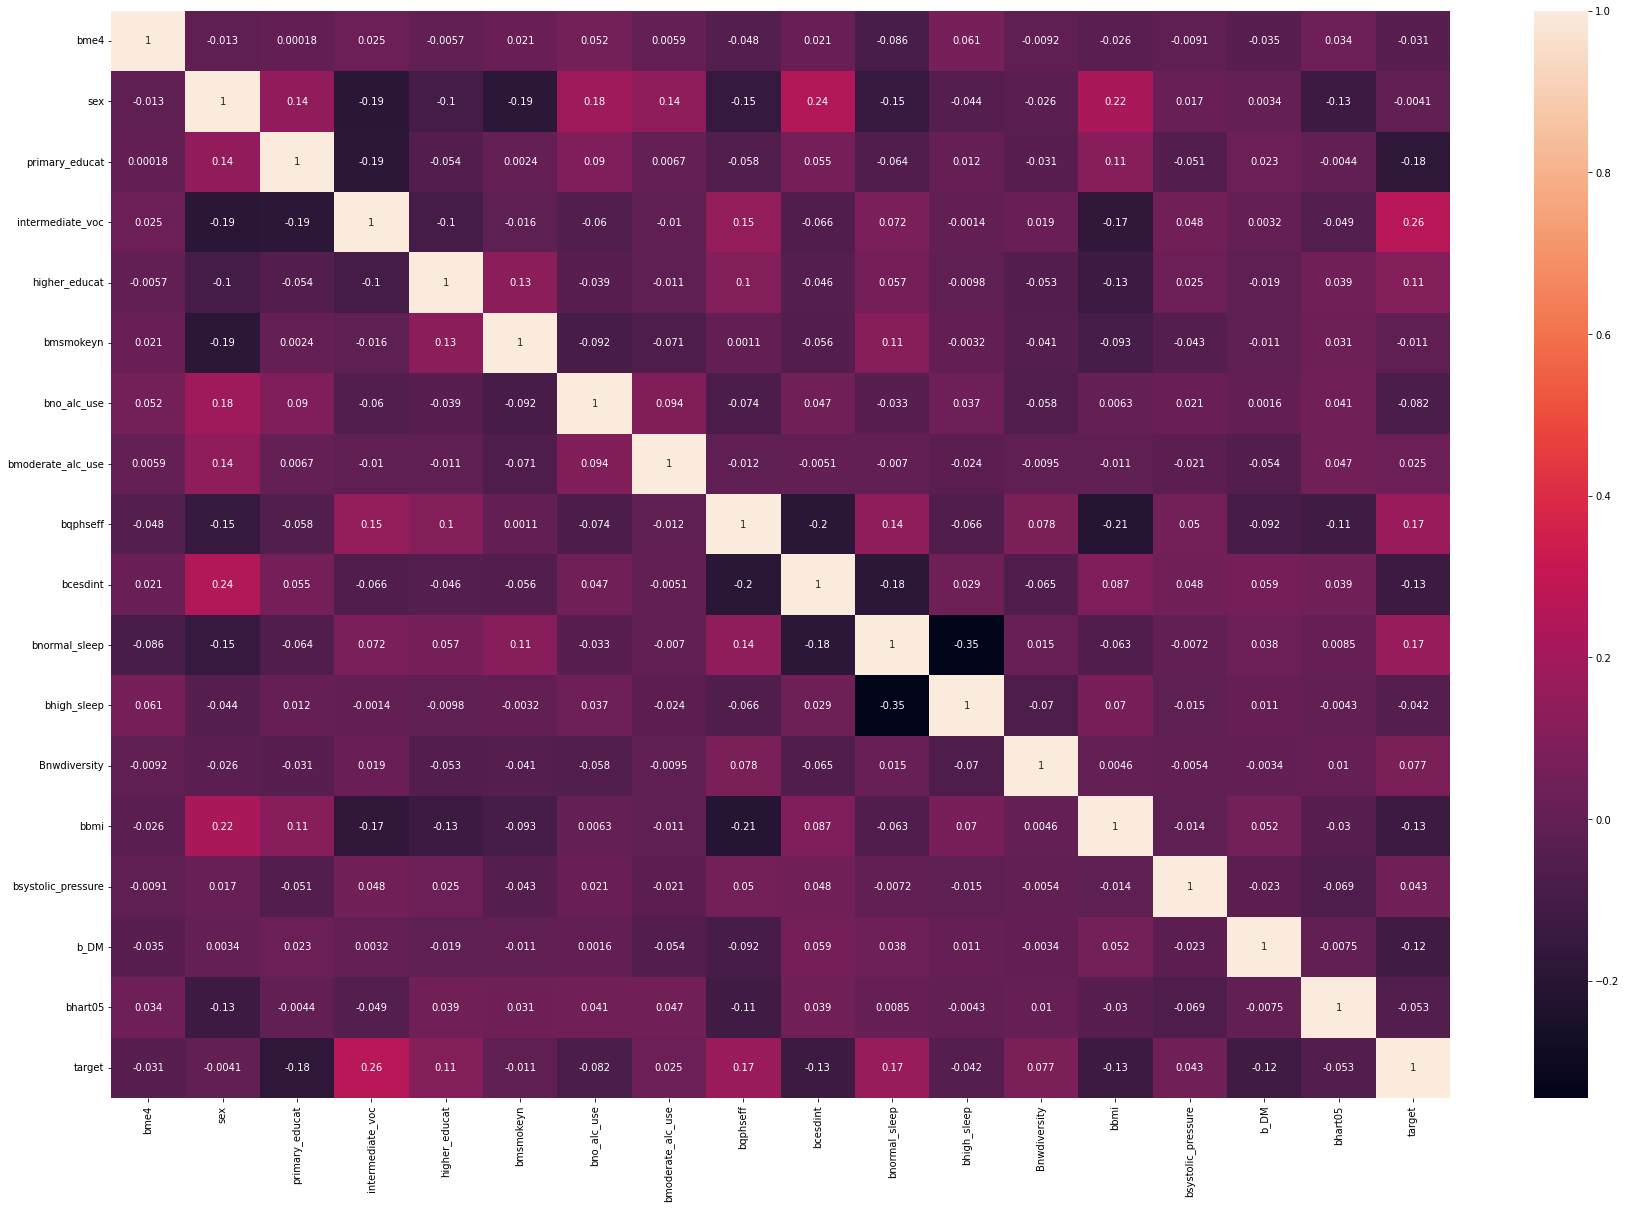

In [46]:

df_train_corr2 = B_df1[baseline_features]

matrix2 = df_train_corr2.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(matrix2, annot=True,linewidths=0)
plt.show()

## Dealing with Collinear features

In [47]:
#B_df1.bravbtot.corr(B_df1.bcraven)
# bravbtot', 'bcraven'

In [48]:
#corr_matrix = B_df1.corr().abs()
#s = corr_matrix.unstack()
#so = s.sort_values(kind="quicksort", ascending = False)

In [49]:
#so[580:630]

In [50]:
### Drop bmcodt_median 
B_df1.drop(columns = 'bmcodt_median', inplace = True)
### Drop bage or byear (byear)
B_df1.drop(columns = 'byear', inplace = True)
### Drop raven scores other than total score (causing issues with imputation because very collinear)
#B_df1.drop(columns = ['bravatot', 'bravbtot'], inplace = True)


In [51]:
# Deal with one-hot encoded features at the root in the Raw_data_Processing.ipynb file

## Demographics stuff:

In [56]:
# Age
print('mean age: ' + str(B_df1.bage.mean()))
print('median age: ' + str(B_df1.bage.median()))
print('Standard deviation age: ' + str(B_df1.bage.std()))

mean age: 71.52363636363637
median age: 71.0
Standard deviation age: 6.557534647272392


In [62]:
print('mean IPS: ' + str(B_df1.target.mean()))
print('median IPS: ' + str(B_df1.target.median()))
print('Standard deviation IPS: ' + str(B_df1.target.std()))

mean IPS: 23.307878787878785
median IPS: 23.33333333333333
Standard deviation IPS: 7.092664716220611


In [61]:
print('mean income: ' + str(B_df1.binccat.mean()))
print('median income: ' + str(B_df1.binccat.median()))
print('Standard deviation income: ' + str(B_df1.binccat.std()))

mean income: 2481.458742632613
median income: 2125.0
Standard deviation income: 1192.2925863116968


In [63]:
B_df1.sex.value_counts() # Male=0.0, female=1.0

1.0    559
0.0    541
Name: sex, dtype: int64

In [64]:
B_df1.anation.value_counts()

Dutch only      1092
US+Dutch           2
Surinam only       2
French+Dutch       2
Swiss              1
German             1
Name: anation, dtype: int64

In [66]:
B_df1.aethnic.value_counts() # Doesn't really give more information than aboe

born Neth+nat=Neth    1044
Dutch/Netherlands       48
Surinam                  4
Indonesian               2
other                    1
Antillian                1
Name: aethnic, dtype: int64

In [68]:
# Also not extremely interesting
# B_df1.bMunicipality_after_1st_move.value_counts()

In [69]:
B_df1.bMunicipality_at_birth.value_counts() # Maybe include this

Amsterdam                                                                              219
Zwolle                                                                                  61
Oss                                                                                     40
Zwartsluis, expired, becomes 1896, Zwartewaterland (1-1-2001)                           33
Wormerland                                                                              32
Rotterdam                                                                               30
Waterland                                                                               28
Ommen                                                                                   27
Uden                                                                                    27
Indonesia                                                                               26
Genemuiden, expired, becomes 1896, Zwartewaterland (1-1-2001)                           22

In [70]:
B_df1.bMunicipality_in_1944.value_counts()

Amsterdam                                                                    257
Zwolle                                                                        74
Oss                                                                           54
Wormerland                                                                    45
Ommen                                                                         35
Waterland                                                                     32
Zwartsluis, expired, becomes 1896, Zwartewaterland (1-1-2001)                 32
Uden                                                                          30
BRD                                                                           24
Genemuiden, expired, becomes 1896, Zwartewaterland (1-1-2001)                 23
Boekel                                                                        22
Indonesia                                                                     20
Zaanstad                    

In [71]:
B_df1.bMunicipality_curret_res.value_counts() # Include

Amsterdam                                                        280
Oss                                                              139
Zwolle                                                           133
Waterland                                                        108
Ommen                                                             97
Wormerland                                                        91
Uden                                                              78
Zwartsluis, expired, becomes 1896, Zwartewaterland (1-1-2001)     64
Boekel                                                            52
Genemuiden, expired, becomes 1896, Zwartewaterland (1-1-2001)     30
Hasselt, expired, becomes 1896, Zwartewaterland (1-1-2001)        28
Name: bMunicipality_curret_res, dtype: int64

## Deal with last few character features

In [ ]:
B_df1[B_df1.columns[B_df1.dtypes == 'object']]

In [ ]:
# Will only use anation, aethnic, municipality information for looking at demographic differences in population excluded etc (because too many towns and things)
# Also drop features that were one hot encoded
# Also drop the bothsi for now even though they are interesting
B_df1.drop(columns = ['anation','aethnic','bMunicipality_after_1st_move','bMunicipality_at_birth','bMunicipality_in_1944','bMunicipality_curret_res'], inplace = True)

## Save final dataset (for imputation)

#### Perform imputation in R using MICE

In [ ]:
final_target = B_df1['target']
B_df1.drop(columns = 'target', inplace = True)
B_df1.to_csv(path + 'output/dfs/B_df1_nonimputed.csv', index = False)
final_target.to_csv(path + 'output/dfs/final_target.csv', index = False)

### Pause for Running the Imputation------------------------------------------------------------------------------------------------------------------------------

## Read back in the imputed dataset

In [11]:
B_df1_final = pd.read_csv(path + 'output/dfs/B_df1_imputed.csv')

In [13]:
B_df1_final.bcountry_holland.value_counts()

1    1025
0      75
Name: bcountry_holland, dtype: int64

In [ ]:
# Make sure no NA values
(B_df1_final.isna().sum() > 0).sum()

## Distribution of Final target

In [2]:
final_target = pd.read_csv(path + 'output/dfs/final_target.csv')

In [23]:
print('min: ')
print(final_target.target.min())
print('max: ')
print(final_target.target.max())
print('mean: ')
print(final_target.target.mean())
print('std: ')
print(final_target.target.std())

min: 
5.666666666666667
max: 
42.66666666666666
mean: 
23.307878787878785
std: 
7.092664716220611


<AxesSubplot: >

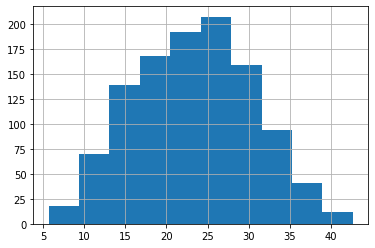

In [10]:
final_target.target.hist()

##  Summary Stats

In [14]:
B_df1_final

,respnr,bmcodt1,bmcodt2,bmcodt3,bmcodtp,bmcodtpoth,bmcodt_mean,bmcodt_std,bnupers,bpets,bcat,bdog,bbird,bpetsoth,bnspecie,bremarks,bcountry_holland,bcountry_other,bprovince_noord_holland,bprovince_other,bmovefut,byneigh,bpleas,bsafe,bhowner_own,bhowner_missing,bhowner_other,brespinc,bhinsura_private,bincdecl,bincsat1,bincsat2,bincfutu,bmemory1,bmemory2,bravamis,bravbmis,braabmis,balcos01,balcos02,balcos03,balcos04,balcos05,balcos06,balcos07,balcos08,balcos09,balcos10,balcos11,balcos12,bcesd01,bcesd02,bcesd03,bcesd04,bcesd05,bcesd06,bcesd07,bcesd08,bcesd09,bcesd10,bcesd11,bcesd12,bcesd13,bcesd14,bcesd15,bcesd16,bcesd17,bcesd18,bcesd19,bcesd20,bcesdmv,banxiet1,banxiet2,banxiet3,banxiet4,banxiet5,banxiet6,banxiet7,bmaster1,bmaster2,bmaster3,bmaster4,bmaster5,bmasmv,bselfes1,bartve8b,bartvei1,bartvei2,bartvei3,bartvei4,bartvei5,bartvei6,bartvei7,bartvei8,bartvei9,bcance5b,bcance5e,bcance5k,bcance5l,bcance7a,bcance7b,bcance7c,bcancer1,bcancer2,bcancer3,bcancer4,bcancer8,bcara01,bcara02,bcara03,bcara04,bcara05,bcara06,bcara07,bcara08,bcara09,bcara10,bcara11,bcara12,bcva01,bcva06,bcva07,bcva08,bcva10,bcva12,bdiabe01,bdiabe02,bdiabe04,bdiabe05,bdiabe07,bdiabe08,bdiabe10,bdiabe11,bdiabe13,bhart01,bhart02,bhart03,bhart04,bhart05,bhart06,bhart10,bhart11,bhart12,bhart13,bhart14,bhart15,bhart15b,bhart15c,bhart16,bincon1,bincon2,bincon3,bincon4,bincon5,bincon6,bincon7,bincon8,bothsi01,bothsi04,bothsi05,bothsi06,bothsi07,bothsi10,bothsi11,bothsi12,brheum01,brheum02,brheum03,brheum04,brheum05,brheum06,brheum07,brheum08,brheum09,brheum10,brheum11,brheum12,brheum8a,brheum8b,brheum8c,brheum8d,brheum8e,brheum8f,brheum8g,brheum8h,brheum8i,brheum9g,brheum9h,brheum_01_and_02,bothsi02_Hypertension,bothsi02_Backproblems,bothsi02_intestinal_and_stomach,bothsi02_Eye_disease,bothsi02_other,bothsi08_none,bm15wth,bm15wtm,bm15wtrnd,bm15wtrno,bhealth1,bhealth3,bhealth4,brhelpyn,bphelpyn,bdhelpyn,bhealth2_3minus,bhealth2_No,bcardig4,bcardig7,bcardig8,bchair3,bchair4,bchair5,bchair6,bchair7,bchair8,bchair9,bwalk01,bwalk02,bwalk03,bwalk04,bwalk05,bwalk07,bwalk09,bwalk10,bwalk19,bsubhea1,bsubhea2,bmedspec,bhosp,bpsych,beval01,beval02,beval03,beval04,blo1,blo2,blo3,blo4,blo5,blo6,blo7,blo8,blo9,blo10,blo11,blo_sum,blo_mode,blo_median,ban1,ban4,ban6,ban8,ban9,ban10,ban_sum,ban_mode,ban_median,bqsatis1,bqsatis2,bqimpor1,bqimpor2,bqimpor3,bqimpor4,bqimpor5,bqimpor6,bqimpor7,bqimpor8,bqimpor9,bqnansw,bqseff01,bqseff02,bqseff03,bqseff04,bqseff05,bqseff06,bqseff07,bqseff08,bqseff09,bqpain1,bqsleep1,bqsleep2,bqsleep3,bqsleep4,bnormal_sleep,bhigh_sleep,bqfood01,bqfood03,bqfood04,bqsocp21,bm.med,bmmeduse,bmmedvittab,bmmedcaltab,bmalcnr,bmalcnr6,bmalcyn,bno_alc_use,bmoderate_alc_use,bmctinch,bmctley1,bmctley2,bmctley3,bmctley4,bmctley5,bmctpart,bmctrey1,bmctrey2,bmctrey3,bmctrey4,bmctrey5,bmctunde,bmdasig1,bmdasig2,bmdasig3,bmpeakf1,bmpeakf2,bmpeakf3,bmpeakfc,bmpeakfp,bmpeakfu,bmpeamax,bme4,bmapo_e22,bmapo_e23,bmapo_e24,bmapo_e33,bmapo_e44,bmweightch,bmweightchkg,bmweightgr,bmweightlr,bmmsesc,bravatot,bravbtot,bcraven,bcesdint,banxint,bmastery,balcos,bcomple,badversi,binitia,bflwdiff,bsensev,bsensevg,bsenseh,bsenseha,bnochrot,bnochrom,blo,bloemo,blosoc,bqphseff,bqsleep,bmtype_a,bmtype_b,bmtype_c,bmtype_d,bmtype_g,bmtype_h,bmtype_j,bmtype_m,bmtype_n,bmtype_p,bmtype_r,bmtype_s,bmtyphom,bmmedad,bmbenanx,bmbenhyp,bmandiab,bmed_ino,bmed_ari,bmed_ang,bmed_hyp,bmed_diu,bmed_pvd,bmed_ali,bmalconw,bmgarret,bmalcopp,bmalcnei,bmdelta,bmret1pc,bmret2pc,bmtmax,bmtotal,bfdoor,bfdoorc,blrooms,bmoved,bnrooms,bnroomsc,bsatis,bspecadj,bhindependent,bhdependent,bhtype_detached,bhtype_semidetached,bhtype_high_rise,bhtype_missing,bhtype_other,bcjpresi,bjob1,bjob6,bretifut,bretired,b_regular_hours,b_iregular_hours,badl1a,badl1b,badl1d,badl4a,badl4b,badl4d,badl6a,badl6b,badl6d,bsense01,bsense02,bsense03,bsense04,bsense05,bsense06,bsense07,bsense08,bsense09,bsense10,bsense11,bsense12,bsense13,blst1c01,blst2c01,blst2c02,blst2c03,blst2c04,blst2c05,blst2c06,blst2c07,blst2c08,blst2c09,blst2c10,blst2c

In [33]:
#Age
print('mean age:')
print(B_df1_final.bage.mean())
print('\n')
#Gender
print('gender separation:')
print(B_df1_final.sex.value_counts())
print('\n')
#Summary statistics for target
## Above
print('Target: ')
print('min: ')
print(final_target.target.min())
print('max: ')
print(final_target.target.max())
print('mean: ')
print(final_target.target.mean())
print('std: ')
print(final_target.target.std())
print('\n')
#Income
print('income summary:')
print('mean:')
print(B_df1_final.binccat.mean())
print('std:')
print(B_df1_final.binccat.std())
print('\n')
#Country (1025 from Netherlands 75 from elsewhere)
print('Born in Holland:')
print(B_df1_final.bcountry_holland.value_counts())
print('\n')

## From Na table from excel sheet created above
#Number of features with missing data
print('548 Features with missing values')

#Average number of missing features
print('Features with missing values have average of %8.1 missing')


mean age:
71.52363636363637


gender separation:
1    559
0    541
Name: sex, dtype: int64


Target: 
min: 
5.666666666666667
max: 
42.66666666666666
mean: 
23.307878787878785
std: 
7.092664716220611


income summary:
mean:
2487.6136363636365
std:
1188.7292443506174


Born in Holland:
1    1025
0      75
Name: bcountry_holland, dtype: int64


548 Features with missing values
Features with missing values have average of %8.1 missing


# Separate into Testing and Training datasets

In [ ]:
from sklearn.model_selection import train_test_split

## Final Training and Testing Set:

In [ ]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(B_df1_final, final_target, test_size=0.30, random_state=42)
#X_train_final.to_csv(path + 'output/dfs/X_train_final.csv', index = False)
#y_train_final.to_csv(path + 'output/dfs/y_train_final.csv', index = False)
#X_test_final.to_csv(path + 'output/dfs/X_test_final.csv', index = False)
#y_test_final.to_csv(path + 'output/dfs/y_test_final.csv', index = False)

## Drop Cognitive test scores

In [ ]:
columns_drop = ['bmcodt1','bmcodt2','bmcodt3','bmcodtp','bmcodtpoth','bmcodt_mean','bmcodt_std',#Information processing speed
               'bravamis', 'bravbmis', 'bravatot', 'bravbtot', 'bcraven', # Raven scores (scaled and non-scaled)
               'bm15wth','bm15wtm','bm15wtrnd','bm15wtrno', # Episodic Memory non-scaled
               'bmmsesc', # MMSE score scaled
               'bmdelta','bmret1pc','bmret2pc','bmtmax', 'bmtotal' # Episodic Memory constructed]
               ]

In [ ]:
B_df1_final_minus = B_df1_final.drop(columns = columns_drop)

In [ ]:
X_train_final_minus, X_test_final_minus, y_train_final_minus, y_test_final_minus = train_test_split(B_df1_final_minus, final_target, test_size=0.30, random_state=42)

In [ ]:
X_train_final_minus.to_csv(path + 'output/dfs/X_train_final_minus.csv', index = False)
X_test_final_minus.to_csv(path + 'output/dfs/X_test_final_minus.csv', index = False)